## STATUS ZERO 
#### Desenvolvedores: Abner
##### Data da criação: 15 Mar 2024

### Lista de atualizações/modificações:
*
    

In [2]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from datetime import datetime
import sys
import numpy as np
import geopy
from geopy import distance
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Caminhos dos diretórios raiz
warnings.filterwarnings("ignore")


general_path = 'C:/Users/abner/OneDrive/Documentos/mestrado/DISSERTAÇÃO/scripts'
general_path_tel='C:/Users/abner/OneDrive/Documentos/mestrado/Telemetria-ANA/Scripts e dados'
pd.set_option('display.max_rows', 3300)


mits_integer = [30, 60, 120, 180, 360, 720, 1439]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,2024]

states = ['AC','AL','AM','AP','BA','CE','DF','ES','GO','MA','MG','MS','MT','PA','PB','PE','PI','PR','RJ','RN','RO','RR','RS','SC','SE','SP','TO']
df_Estacoes_alta=pd.read_csv(general_path+'/Estacoes_Alta_Qualidade_da_Analise_Visual.csv',sep=';')
pd.set_option('display.max_rows', None)

### DF STATUS

In [ ]:
# Script principal para determinar o número de anos por estação


df_years=pd.DataFrame(columns=['state','city','long','lat','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024'])              
#df_code=df_gauges.drop_duplicates(subset='gauge_code', keep='last')

for year in years:
    for state in states:
        filename = str(state) +'_'+ str(year) + '.h5'
        df_cemaden_info = pd.read_hdf(general_path + '/1 - Organized data/' + filename,'table_info')
        df_cemaden_info=df_cemaden_info.set_index('gauge_code') 
        name_hq= state + '_ ' + str(year)
        df_codes=df_Estacoes_alta.dropna(subset = [name_hq])[:-1]
        for code in df_codes[name_hq]:
            df_years.at[code,'state']=df_cemaden_info.loc[code,'state']
            df_years.at[code,'city']=df_cemaden_info.loc[code,'city']
            df_years.at[code,'long']=df_cemaden_info.loc[code,'long']
            df_years.at[code,'lat']=df_cemaden_info.loc[code,'lat']
            if year==2022 :
                df_years.at[code,'long']=df_cemaden_info.loc[code,'lat']
                df_years.at[code,'lat']=df_cemaden_info.loc[code,'long']
            df_years.at[code,str(year)]=1
    print(year)
print('Processado!')

In [ ]:
#df_status com o status de cada estação para cada ano

df_status=df_years.fillna(0)
df_status['sum'] = df_status[[str(year) for year in years]].sum(axis=1)
df_status_zero=df_status #status original
df_status=df_status.sort_values(by=['sum'],ascending = False)
df_status=df_status.sort_values(by=['sum'],ascending = False)
df_status.rename(columns={'Unnamed: 0': 'gauge_code'}, inplace=True)
df_status.to_csv(general_path + '/STATUS_ZERO.csv')
df_status['sum'].value_counts()

In [ ]:
len(df_status)

In [ ]:
df = df_status['sum'].value_counts().reset_index()
df.columns = ['n_anos', 'n_gauges'] 
df['produto'] = df['n_anos'] * df['n_gauges']
df['produto'].sum()

In [ ]:
## df status TELEMETRIA
df_years=pd.DataFrame(columns=['state','city','long','lat']+[str(year) for year in years])              
#df_code=df_gauges.drop_duplicates(subset='gauge_code', keep='last')

for year in years:
    df_tel_hq_list=pd.read_excel(general_path+'/Estacoes_telemetria_HQ.xlsx')[year].dropna().astype(int).tolist()
    for state in states:
        filename = str(state) +'_'+ str(year) + '.h5'
        df_info = pd.read_hdf(general_path_tel + '/1 - Organized data/' + filename,'table_info')
        df_info=df_info.set_index('gauge_code')
        df_state=df_info.reset_index()['gauge_code'].astype(int)
        name_hq= state + '_ ' + str(year)
        for code in df_tel_hq_list:
            if code in df_state.tolist():
                df_years.at[str(code),'state']=df_info.loc[str(code),'state']
                df_years.at[str(code),'city']=df_info.loc[str(code),'city']
                df_years.at[str(code),'long']=df_info.loc[str(code),'long']
                df_years.at[str(code),'lat']=df_info.loc[str(code),'lat']
                df_years.at[str(code),str(year)]=1
    print(year)
print('Processado!')

In [ ]:
#df_status com o status de cada estação para cada ano

df_status=df_years.fillna(0)
df_status['sum'] = df_status[[str(year) for year in years]].sum(axis=1)
df_status_zero=df_status.sort_values(by='sum', ascending=False)#status original
df_status_zero.to_csv(general_path_tel + '/STATUS_ZERO_TEL.xlsx')
df_status['sum'].value_counts()

In [ ]:
len(df_status_zero)

In [ ]:
df = df_status['sum'].value_counts().reset_index()
df.columns = ['n_anos', 'n_gauges'] 
df['produto'] = df['n_anos'] * df['n_gauges']
df['produto'].sum()

### VISUALIZE

In [4]:
# Abrir STATUS_ZERO para Telemetria e Cemaden
df_status_cem = pd.read_csv(general_path + '/STATUS_ZERO.csv')
df_status_cem.rename(columns={'Unnamed: 0': 'gauge_code'}, inplace=True)

df_status_tel = pd.read_csv(general_path_tel + '/STATUS_ZERO_TEL.csv')
df_status_tel.rename(columns={'Unnamed: 0': 'gauge_code'}, inplace=True)

# Abrir shapefile do Brasil
brasil_uf = gpd.read_file(r'C:\Users\ABNER\OneDrive\Documentos\mestrado\Telemetria-ANA\Shapefile\Brasil_UF\BR_UF_2022.shp')
brasil_shapefile = brasil_uf.to_crs('EPSG:4674')

In [ ]:
geodf_tel = gpd.GeoDataFrame(df_status_tel, crs='EPSG:4674', geometry=gpd.points_from_xy(df_status_tel.long, df_status_tel.lat))
geodf_cem = gpd.GeoDataFrame(df_status_cem, crs='EPSG:4674', geometry=gpd.points_from_xy(df_status_cem.long, df_status_cem.lat))
fig, ax = plt.subplots(figsize=(10, 10))
brasil_shapefile.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
geodf_tel.plot(ax=ax, color='#ff7f0e',edgecolor='black',linewidth=0.5, markersize=13, label='Telemetria')
geodf_cem.plot(ax=ax, color='#1f77b4',edgecolor='black',linewidth=0.5, markersize=13, label='Cemaden')
ax.set_title(f"Estações das redes Telemetria e Cemaden sobre o Brasil (2014 - 2024)", fontsize=18, weight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.savefig(general_path + r'\2 - Result_images\Pontos _TEL_CEM_TOT_.png', dpi=300, bbox_inches='tight')
plt.show()


# VER TRANSFORMAÇÕES DF STATUS


In [ ]:

df_status_final=pd.read_csv(general_path +'/df_status_final_+5mean_rainfall_intensity_radius_40km.csv')
df_substituicoes=pd.read_csv(general_path +'/df_substituiçoes_+5mean_rainfall_intensity_radius_40km.csv').drop(columns=['Unnamed: 0'])#STATUS ZERO PARA COMPARAÇAO
df_status_zero=pd.concat([df_status_cem, df_status_tel], ignore_index=True).sort_values(by='sum',ascending=False).reset_index(drop=True)
df_status_zero['gauge_code']=df_status_zero['gauge_code'].astype(str)

# Transformar DataFrames em GeoDataFrames
gdf_status_zero = gpd.GeoDataFrame(
    df_status_zero, 
    crs='EPSG:4674', 
    geometry=gpd.points_from_xy(df_status_zero.long, df_status_zero.lat)
)
gdf_status_final = gpd.GeoDataFrame(
    df_status_final, 
    crs='EPSG:4674', 
    geometry=gpd.points_from_xy(df_status_final.long, df_status_final.lat)
)



#### JUNTAR RESULTS telemetria e cemaden e preencher df_status

In [ ]:
name_col='TO_2023'

pd.read_hdf(f"{general_path}/Results erosivity/CEMADEN/Results_{name_col}.h5",key='annual')

In [ ]:
#CONSOLIDAR TEL CMDN
# Caminho do arquivo HDF5 final consolidado
final_hdf_path = f"{general_path}/Results erosivity/Erosivity_final.h5"

for state in states:
    for year in years:
        name_col = f"{state}_{year}"

        path_cem = f"{general_path}/Results erosivity/CEMADEN/Results_{name_col}.h5"
        path_tel = f"{general_path}/Results erosivity/TELEMETRIA/Results_{name_col}.h5"

        cem_exists = os.path.exists(path_cem)
        tel_exists = os.path.exists(path_tel)

        if not cem_exists and not tel_exists:
            print(f"❌ Nenhum arquivo encontrado para {name_col}")
            continue

        try:
            # Obter as chaves a partir do primeiro arquivo existente
            keys = []
            if cem_exists:
                with pd.HDFStore(path_cem, mode='r') as store:
                    keys = [k.strip("/") for k in store.keys()]
            elif tel_exists:
                with pd.HDFStore(path_tel, mode='r') as store:
                    keys = [k.strip("/") for k in store.keys()]

            for key in keys:
                dfs = []

                if cem_exists:
                    df_cem = pd.read_hdf(path_cem, key=key)
                    dfs.append(df_cem)

                if tel_exists:
                    df_tel = pd.read_hdf(path_tel, key=key)
                    df_tel['gauge_code'] = df_tel['gauge_code'].astype(str)
                    dfs.append(df_tel)

                df_combined = pd.concat(dfs, ignore_index=True)

                final_key = f"{name_col}/{key}"
                df_combined.to_hdf(final_hdf_path, key=final_key, mode='a')

            if cem_exists and not tel_exists:
                print(f"⚠️ Só CEMADEN encontrada para {name_col}")
            elif tel_exists and not cem_exists:
                print(f"⚠️ Só TELEMETRIA encontrada para {name_col}")
            else:
                print(f"✅ CEMADEN e TELEMETRIA combinadas para {name_col}")

        except Exception as e:
            print(f"💥 Erro ao processar {name_col}: {e}")

print(f"\n✅ Arquivo HDF consolidado completo salvo em: {final_hdf_path}")




In [ ]:
with pd.HDFStore(os.path.join('C:/Users/abner/OneDrive/Documentos/mestrado/DISSERTAÇÃO/scripts/Results erosivity/Erosivity_final.h5')) as hdf:
    keys = hdf.keys()  # Obtém todas as chaves do arquivo HDF
    for key in keys:  # Itera por cada chave
        df = pd.read_hdf(hdf, key=key)  # Lê os dados de cada chave
        print(f"Chave: {key}, Número de linhas: {len(df)}")

In [ ]:
#CONSOLIDAR ANUAL
for state in states:
    for year in years:
        name_col=state+'_'+ str(year)        
        try:
            # Lendo os arquivos Excel
            df_res_cem = pd.read_excel(f"C:/Users/abner/OneDrive/Paper Abner/Results erosivity/CEMADEN/Results_{name_col}.h5")
            df_res_tel = pd.read_excel(f"C:/Users/abner/OneDrive/Paper Abner/Results erosivity/TELEMETRIA/Results_{name_col}.h5")
            df_res_tel['gauge_code'] = df_res_tel['gauge_code'].astype(str)
        except FileNotFoundError as e:
            print(f"Arquivo não encontrado para {name_col}: {e}")
            continue
        
        # Concatenando os DataFrames
        df_combined = pd.concat([df_res_cem, df_res_tel], ignore_index=True)
        
        # Salvando no arquivo HDF em uma chave específica
        df_combined.to_hdf(f"{general_path}/Erosivity_final.h5", key=name_col, mode="a")
        print(f"Dados salvos na chave: {name_col}")

print(f"Arquivo HDF consolidado salvo em hdf")

In [ ]:
len(df_status_tel)

In [9]:
df_status=pd.concat([df_status_cem, df_status_tel], ignore_index=True).sort_values(by='sum',ascending=False).reset_index(drop=True)
df_status['gauge_code']=df_status['gauge_code'].astype(str)

In [ ]:
len(df_EI_30)

In [ ]:
anos = [str(ano) for ano in range(2014, 2025)]
df_EI_30[df_EI_30[anos].isin([1]).any(axis=1)]


In [ ]:
df_EI_30[df_EI_30 == 1].dropna(how='all')

In [ ]:
df_EI_30.iloc[328:330]

In [ ]:
# Copiar status inicial
df_EI_30 = df_status.copy().set_index('gauge_code')

for state in states:
    for year in years:
        name_col = f"{state}_{year}"
        hdf_path = f"{general_path}/Results erosivity/Erosivity_final.h5"
        key = f"{name_col}/annual"

        try:
            df_combined_data = pd.read_hdf(hdf_path, key=key).set_index('gauge_code')
        except (FileNotFoundError, KeyError) as e:
            print(f"⚠️ Dados não encontrados para {key}: {e}")
            continue

        for code in df_combined_data.index:
            if code in df_EI_30.index:
                df_EI_30.loc[code, str(year)] = df_combined_data.loc[code, 'EI30']

 

In [ ]:
df_EI_30

In [17]:
#agora para toda\s as cvhves
# Copiar status inicial
import pandas as pd

# Inicializa dicionários para armazenar os DataFrames de cada mês
rain_monthly_results = {f"month_{i:02d}": df_status.copy().set_index('gauge_code') for i in range(1, 13)}
rain_monthly_results["annual"] = df_status.copy().set_index('gauge_code')

# Loop pelos estados e anos
for state in states:
    for year in years:
        name_col = f"{state}_{year}"
        hdf_path = f"{general_path}/Results erosivity/Erosivity_final.h5"

        for key in list(rain_monthly_results.keys()):
            full_key = f"{name_col}/{key}"

            try:
                df_combined_data = pd.read_hdf(hdf_path, key=full_key).set_index('gauge_code')
            except (FileNotFoundError, KeyError) as e:
                print(f"⚠️ Dados não encontrados para {full_key}: {e}")
                continue

            for code in df_combined_data.index:
                if code in rain_monthly_results[key].index:
                    rain_monthly_results[key].loc[code, str(year)] = df_combined_data.loc[code, 'E_D']

# Salva os resultados finais em um único arquivo HDF5 com as 13 chaves
output_path = f"{general_path}/Results erosivity/E_D_all_months.h5"
with pd.HDFStore(output_path, mode='w') as store:
    for key, df in rain_monthly_results.items():
        store.put(key, df)

print("✅ Todos os dados foram salvos em:", output_path)



⚠️ Dados não encontrados para AL_2014/month_01: 'No object named AL_2014/month_01 in the file'
⚠️ Dados não encontrados para AL_2014/month_02: 'No object named AL_2014/month_02 in the file'
⚠️ Dados não encontrados para AL_2014/month_03: 'No object named AL_2014/month_03 in the file'
⚠️ Dados não encontrados para AL_2014/month_04: 'No object named AL_2014/month_04 in the file'
⚠️ Dados não encontrados para AL_2014/month_05: 'No object named AL_2014/month_05 in the file'
⚠️ Dados não encontrados para AL_2014/month_06: 'No object named AL_2014/month_06 in the file'
⚠️ Dados não encontrados para AL_2014/month_07: 'No object named AL_2014/month_07 in the file'
⚠️ Dados não encontrados para AL_2014/month_08: 'No object named AL_2014/month_08 in the file'
⚠️ Dados não encontrados para AL_2014/month_09: 'No object named AL_2014/month_09 in the file'
⚠️ Dados não encontrados para AL_2014/month_10: 'No object named AL_2014/month_10 in the file'
⚠️ Dados não encontrados para AL_2014/month_11: 'N

In [ ]:
df_combined_data

In [196]:
year=str(2020)
df=pd.read_hdf(f"{general_path}/Results erosivity/EI30_all_months.h5",key='month_01')
#.loc[['76310000','17354930','17389000']]
df.sort_values(by=year,ascending=False).head(15)

,state,city,long,lat,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum
gauge_code,,,,,,,,,,,,,,,,
315390501A,MG,RAPOSOS,-43.807001,-19.969057,0.0,0.000000,0.000000,0.000000,0.000000,86.014924,13392.296637,778.585801,3482.484959,2801.563924,0.000000,5
210320802A,MA,CHAPADINHA,-43.354885,-3.740662,0.0,0.000000,0.000000,0.000000,0.000000,2244.134117,11522.538336,0.000000,0.000000,0.000000,1194.927059,3
56984000,MG,SÃO JOSÉ DO MANTIMENTO,-41.750300,-20.041400,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,11438.708699,0.000000,0.000000,0.000000,526.918091,2
330390617A,RJ,PETR├ôPOLIS,-43.220000,-22.520000,0.0,0.000000,0.000000,0.000000,6532.337592,1881.590484,8746.500781,0.000000,2427.371013,0.000000,0.000000,4
58729800,MG,GUARANI,-43.084400,-21.325800,0.0,0.000000,3304.423285,0.000000,2514.816855,0.000000,8347.628217,0.000000,0.000000,0.000000,0.000000,3
320030001A,ES,ALFREDO CHAVES,-40.754390,-20.634100,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8328.456444,74.697788,1126.455009,965.682097,1343.575225,5
58731000,MG,GUARANI,-42.965800,-21.337500,0.0,0.000000,0.000000,0.000000,0.000000,427.930109,8021.207603,0.000000,0.000000,0.000000,0.000000,2
315460603A,MG,RIBEIRÃO DAS NEVES,-44.006578,-19.810011,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7545.153224,1214.657086,2797.215360,4356.851068,1432.413800,6
320220702A,ES,FUNDÃO,-40.408000,-19.935000,0.0,71.418847,760.655852,298.015871,508.025047,0.000000,7021.869516,0.000000,0.000000,0.000000,492.018877,7


In [178]:
df_outliers = pd.read_hdf(os.path.join(general_path, "Results erosivity", "outliers_by_year.h5"), key='2020')
lista_outliers = df_outliers['gauge_code'].to_list()

In [ ]:
pd.read_hdf(general_path + '/3 - Rainfall events/'+ name_file, name).drop_duplicates()

In [180]:
'86321000'in lista_outliers

True

In [68]:
import os
import numpy as np
import pandas as pd
import rasterio

mapa = 'EI_30'
results = []

with pd.HDFStore(f"{general_path}/Results erosivity/rain_all_months.h5") as store:
    keys = store.keys()

for key in keys:
    mean_path = os.path.join(
        general_path, 'Results erosivity', '1 - Result_images', 'mapas mensais',
        f'{mapa}_mean_2014_2024{key.replace("/", "_")}.tif'
    )
    with rasterio.open(mean_path) as src_mean:
        raster_mean = src_mean.read(1)
        valid_mean = raster_mean[~np.isnan(raster_mean)]
        min_val = valid_mean.min()
        max_val = valid_mean.max()
        mean_val = valid_mean.mean()
        results.append({
            'Key': key,
            'Min': min_val,
            'Max': max_val,
            'Mean': mean_val
        })

df = pd.DataFrame(results)

output_csv = os.path.join(
    general_path, 'Results erosivity', '1 - Result_images', 'mapas mensais',
    f'{mapa}_mean_min_max_avg_2014_2024.csv'
)
df.to_csv(output_csv, index=False)

print(f"Arquivo CSV salvo em: {output_csv}")




Arquivo CSV salvo em: C:/Users/abner/OneDrive/Documentos/mestrado/DISSERTAÇÃO/scripts\Results erosivity\1 - Result_images\mapas mensais\EI_30_mean_min_max_avg_2014_2024.csv


In [70]:
df

,Key,Min,Max,Mean
0,/annual,2032.523598,22798.312145,10783.045226
1,/month_01,206.866017,2372.769653,1263.951302
2,/month_02,240.442573,2226.673418,1287.356228
3,/month_03,368.095344,2509.223331,1369.074730
4,/month_04,376.885609,2536.825883,1315.632901
5,/month_05,345.606941,2586.729166,1236.091564
6,/month_06,318.020080,2355.967578,1116.845172
7,/month_07,284.848745,2172.363485,1012.570288
8,/month_08,251.303770,1999.321009,921.712430
9,/month_09,225.998290,1846.616034,861.206625


In [24]:

df.loc[['14840000']]

,state,city,long,lat,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum
gauge_code,,,,,,,,,,,,,,,,
14840000,AM,BARCELOS,-61.6347,-1.4567,0.0,0.0,0.0,308.4,191.0,0.0,138.4,0.0,130.8,186.0,0.0,5


In [51]:
hdf_path

'C:/Users/abner/OneDrive/Documentos/mestrado/DISSERTAÇÃO/scripts/Results erosivity/EI_30_all_months.h5'

In [103]:
codes = ['210350501A', '412570402A', '14840000']
mapas = ['EI30', 'E_D', 'rain']
keys = [f'month_{str(i).zfill(2)}' for i in range(1, 13)]

# Dicionário para armazenar os dados
resultados = {code: {mapa: [] for mapa in mapas} for code in codes}

for code in codes:
    for mapa in mapas:
        hdf_path = f"{general_path}/Results erosivity/{mapa}_all_months.h5"
        for key in keys:
            df = pd.read_hdf(hdf_path, key=key).reset_index()
            valor = df.loc[df['gauge_code'] == code, [str(y) for y in range(2014, 2025)]]
            if not valor.empty:
                media = valor.replace(0, pd.NA).mean(axis=1).values[0]
            else:
                media = None
            resultados[code][mapa].append(media)

# Transformar os resultados em DataFrames
df_A = pd.DataFrame(resultados[codes[0]], index=keys)
df_B = pd.DataFrame(resultados[codes[1]], index=keys)
df_C   = pd.DataFrame(resultados[codes[2]], index=keys)



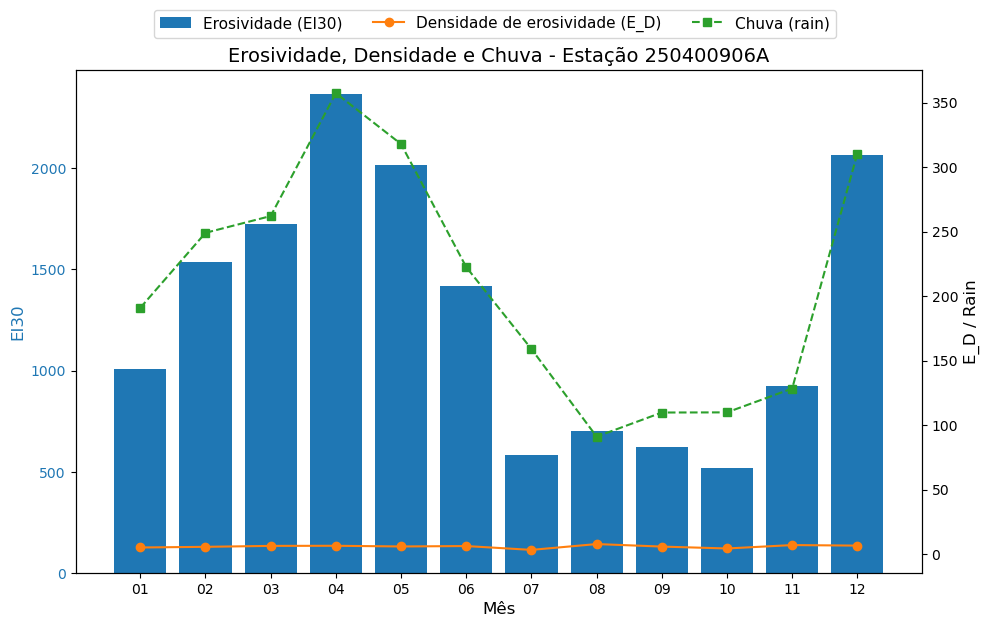

In [97]:
import matplotlib.pyplot as plt

# Supondo que df_250400906A já esteja definido e tenha as colunas: 'EI_30', 'E_D', 'rain'
df_plot = df_14840000.copy()
df_plot.index = [f'{i:02}' for i in range(1, 13)]  # Índice de meses como '01', '02', ...

# Cores
color_bar = '#1f77b4'    # Azul para barras
color_line1 = '#ff7f0e'  # Laranja para linha de densidade de erosividade
color_line2 = '#2ca02c'  # Verde para linha de chuva

fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras: erosividade
bars = ax1.bar(df_plot.index, df_plot['EI30'], color=color_bar, label='Erosividade (EI30)')
ax1.set_ylabel('EI30', color=color_bar, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.set_xlabel('Mês', fontsize=12)

# Cria um segundo eixo y para as linhas
ax2 = ax1.twinx()
line1, = ax2.plot(df_plot.index, df_plot['E_D'], color=color_line1, marker='o', label='Densidade de erosividade (E_D)')
line2, = ax2.plot(df_plot.index, df_plot['rain'], color=color_line2, marker='s', linestyle='--', label='Chuva (rain)')
ax2.set_ylabel('Rain (mm)', fontsize=12)
ax2.tick_params(axis='y')

# Título e legenda

fig.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=11)

plt.tight_layout()
plt.show()


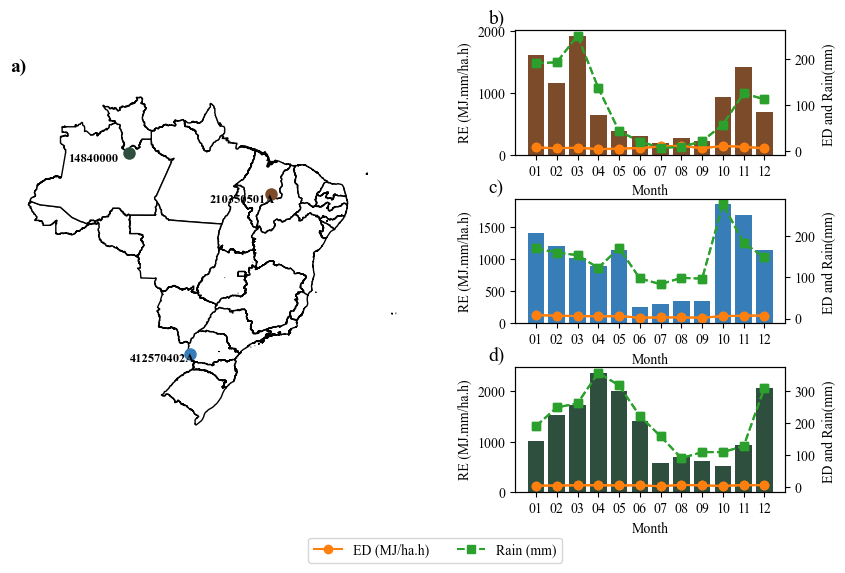

In [173]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Fonte global
plt.rcParams.update({'font.family': 'Times New Roman'})

# Dados fictícios das estações (substitua pelos seus)
dfs = {
    '210350501A': df_A,
    '412570402A': df_B,
    '14840000': df_C,
}
stations = list(dfs.keys())

# Coordenadas (adicione as reais aqui)
coords = {
    '210350501A': (-44.2, -6.30),
    '412570402A': (-54.1, -25.3),
    '14840000': (-61.60, -1.45),
}

# Carrega o shapefile do Brasil

# Cria figura e subplots com layout personalizado
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(3, 2, width_ratios=[3, 2], height_ratios=[1, 1, 1], wspace=0.3, hspace=0.35)


# Mapa à esquerda (ocupa as 3 linhas da coluna 0)
ax_map = fig.add_subplot(gs[:, 0])
brasil_uf.plot(ax=ax_map, color='white', edgecolor='black')

# Lista de cores para as estações
cores = ['#7B4B2A', '#377eb8', '#2E4F3E']  

# Plota os pontos das estações com cores diferentes
for i, (code, (lon, lat)) in enumerate(coords.items()):
    cor = cores[i % len(cores)]  # garante que não estoure se tiver mais de 3 estações
    ax_map.plot(lon, lat, marker='o', color=cor, markersize=8)
    ax_map.text(lon - 7.5, lat, code, fontsize=9, color='k', verticalalignment='top', fontweight='bold')


ax_map.set_title('a)', loc='left', fontsize=14, fontweight='bold')
ax_map.set_axis_off()

# Gráficos por estação
colors = {
    'bar': '#1f77b4',
    'line1': '#ff7f0e',
    'line2': '#2ca02c'
}
labels = ['b)', 'c)', 'd)']

for i, code in enumerate(stations):
    df_plot = dfs[code].copy()
    df_plot.index = [f'{i:02}' for i in range(1, 13)]

    ax1 = fig.add_subplot(gs[i, 1])
    bars = ax1.bar(df_plot.index, df_plot['EI30'], color=cores[i], label='RE (MJ.mm/ha.h)')
    ax1.set_ylabel('RE (MJ.mm/ha.h)', color='k', fontsize=10)
    ax1.tick_params(axis='y', labelcolor='k')
    ax1.set_xlabel('Month', fontsize=10)

    # Segundo eixo
    ax2 = ax1.twinx()
    ax2.plot(df_plot.index, df_plot['E_D'], color=colors['line1'], marker='o', label='ED (MJ/ha.h)')
    ax2.plot(df_plot.index, df_plot['rain'], color=colors['line2'], marker='s', linestyle='--', label='Rain (mm)')
    ax2.set_ylabel('ED and Rain(mm) ', fontsize=10)
    ax2.tick_params(axis='y')
    l1, = ax2.plot(df_plot.index, df_plot['E_D'], color=colors['line1'], marker='o', label='ED (MJ/ha.h)')
    l2, = ax2.plot(df_plot.index, df_plot['rain'], color=colors['line2'], marker='s', linestyle='--', label='Rain (mm)')
   
    # Letra do gráfico
    ax1.text(-0.1, 1.05, labels[i], transform=ax1.transAxes, fontsize=14)

    # Guarda as linhas da legenda (apenas do primeiro)
    if i == 0:
        legend_lines = [l1, l2]
        legend_labels = [l1.get_label(), l2.get_label()]

# Legenda geral da figura
fig.legend(legend_lines, legend_labels,
           loc='lower center',
           bbox_to_anchor=(0.55, -0.02),  # ajusta conforme necessário
           ncol=3, fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(general_path, 'Results erosivity', f'map_by gauge.png'), dpi=300, pil_kwargs={"compression": "tiff_lzw"})
plt.show()


In [ ]:
df_usle=pd.read_hdf(f"{general_path}/Results_erosivity_zero.h5",key='EI_30')
df_rusle2=pd.read_hdf(f"{general_path}/Results erosivity/EI30_all_months.h5",key='annual').reset_index()


In [57]:
df.head()

,gauge_code,state,city,long,lat,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,sum
0,521190901A,GO,JATAÍ,-51.725000,-17.887000,0.0,195.743516,1502.432808,641.747902,1171.714053,998.065639,1858.946764,1846.773824,2014.126797,1299.163859,3216.636238,10
1,412570402A,PR,SÃO MIGUEL DO IGUAÇU,-54.222000,-25.344000,0.0,938.711509,960.151627,420.568273,535.222652,1109.718586,2091.874922,3222.354326,1693.804490,1709.208412,1415.942725,10
2,313170304A,MG,ITABIRA,-43.195000,-19.595000,0.0,333.760062,1125.174062,683.689102,4934.187250,285.290645,2354.023254,502.958842,3030.945182,4457.684312,3642.101630,10
3,410330501A,PR,BORRAZÓPOLIS,-51.590000,-23.942000,0.0,2222.345540,1779.732297,1417.068461,1628.311841,683.138824,211.313706,3320.298241,559.209049,1973.704678,1202.574103,10
4,355250203A,SP,SUZANO,-46.322502,-23.496096,0.0,230.732479,3758.186241,1040.244149,944.624311,1707.655452,3130.954043,2480.739932,679.701630,1275.041727,888.313358,10


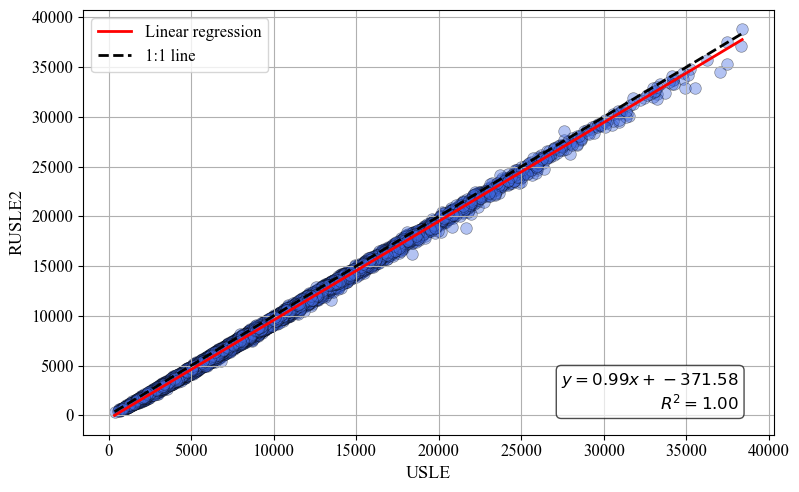

In [198]:
#### RUSLE VCS USLE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

years = [str(y) for y in range(2014, 2025)]

df_usle = pd.read_hdf(f"{general_path}/Results_erosivity_zero.h5", key='EI_30') 
df_rusle2 = pd.read_hdf(f"{general_path}/Results erosivity/EI30_all_months.h5", key='annual')

df_usle = df_usle.set_index('gauge_code')
df_rusle2.index.name = 'gauge_code'

df_usle.index = df_usle.index.astype(str).str.strip()
df_rusle2.index = df_rusle2.index.astype(str).str.strip()

df_usle_long = df_usle[years].stack().reset_index()
df_usle_long.columns = ['gauge_code', 'year', 'usle_value']

df_rusle2_long = df_rusle2[years].stack().reset_index()
df_rusle2_long.columns = ['gauge_code', 'year', 'rusle2_value']

merged = pd.merge(df_usle_long, df_rusle2_long, on=['gauge_code', 'year'], how='inner')

merged = merged[
    (merged['usle_value'] > 0) &
    (merged['rusle2_value'] > 0) &
    (merged['usle_value'] <= 40000) &
    (merged['rusle2_value'] <= 40000) &
    (merged['usle_value'] <= 1.5 * merged['rusle2_value'])
].dropna()

X = merged[['usle_value']].values
y = merged['rusle2_value'].values

reg = LinearRegression().fit(X, y)
slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(8, 5))
plt.scatter(
    merged['usle_value'], merged['rusle2_value'],
    s=70, alpha=0.4, edgecolors='black', linewidth=0.5, color='royalblue'
)

x_vals = np.linspace(min(X)[0], max(X)[0], 100)
plt.plot(x_vals, slope * x_vals + intercept, color='red', lw=2, label='Linear regression')
plt.plot(x_vals, x_vals, color='k',lw=2, linestyle='--', label='1:1 line')

eq_text = f'$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r2:.2f}$'
plt.text(0.95, 0.05, eq_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right',fontfamily='Times New Roman',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

plt.xlabel('USLE',fontsize=13)
plt.ylabel('RUSLE2', fontsize=13)
plt.legend( fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.tick_params(labelsize=12)
plt.savefig(f"{general_path}/Results erosivity/FINAL IMAGES/uslevsrusle2.png", dpi=300, facecolor='white')

plt.show()






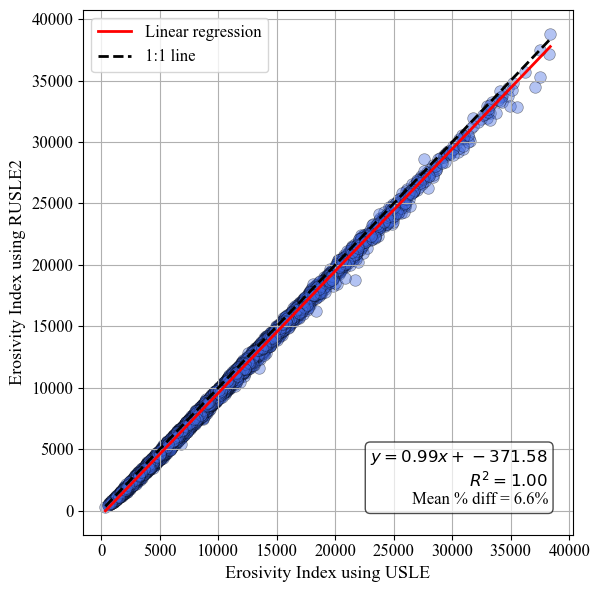

In [205]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

years = [str(y) for y in range(2014, 2025)]

df_usle = pd.read_hdf(f"{general_path}/Results_erosivity_zero.h5", key='EI_30') 
df_rusle2 = pd.read_hdf(f"{general_path}/Results erosivity/EI30_all_months.h5", key='annual')

df_usle = df_usle.set_index('gauge_code')
df_rusle2.index.name = 'gauge_code'

df_usle.index = df_usle.index.astype(str).str.strip()
df_rusle2.index = df_rusle2.index.astype(str).str.strip()

df_usle_long = df_usle[years].stack().reset_index()
df_usle_long.columns = ['gauge_code', 'year', 'usle_value']

df_rusle2_long = df_rusle2[years].stack().reset_index()
df_rusle2_long.columns = ['gauge_code', 'year', 'rusle2_value']

merged = pd.merge(df_usle_long, df_rusle2_long, on=['gauge_code', 'year'], how='inner')

merged = merged[
    (merged['usle_value'] > 0) &
    (merged['rusle2_value'] > 0) &
    (merged['usle_value'] <= 40000) &
    (merged['rusle2_value'] <= 40000) &
    (merged['usle_value'] <= 1.5 * merged['rusle2_value'])
].dropna()

X = merged[['usle_value']].values
y = merged['rusle2_value'].values

reg = LinearRegression().fit(X, y)
slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

# Diferença percentual média
percent_diff = np.mean(np.abs((merged['usle_value'] - merged['rusle2_value']) / merged['rusle2_value'])) * 100

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(6, 6))
plt.scatter(
    merged['usle_value'], merged['rusle2_value'],
    s=70, alpha=0.4, edgecolors='black', linewidth=0.5, color='royalblue'
)

x_vals = np.linspace(min(X)[0], max(X)[0], 100)
plt.plot(x_vals, slope * x_vals + intercept, color='red', lw=2, label='Linear regression')
plt.plot(x_vals, x_vals, color='k', lw=2, linestyle='--', label='1:1 line')

# Texto com equação + diferença percentual
eq_text = f'$y = {slope:.2f}x + {intercept:.2f}$\n$R^2 = {r2:.2f}$\nMean % diff = {percent_diff:.1f}%'
plt.text(0.95, 0.05, eq_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='bottom', horizontalalignment='right', fontfamily='Times New Roman',
         bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7))

# Labels dos eixos
plt.xlabel('Erosivity Index using USLE', fontsize=13)
plt.ylabel('Erosivity Index using RUSLE2', fontsize=13)

plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.tick_params(labelsize=12)
plt.savefig(f"{general_path}/Results erosivity/FINAL IMAGES/uslevsrusle2.png", dpi=300, facecolor='white', pil_kwargs={"compression": "tiff_lzw"})

plt.show()


In [ ]:
merged['rusle2_value'].iloc[1]+10000

In [ ]:
merged['rusle2_value'] = merged['rusle2_value'].apply(clean_brazilian_number)
print(merged['rusle2_value'].describe())
print(merged['rusle2_value'].head(10))


In [ ]:
# Transforma rusle2_value para string com dois decimais e sem notação científica
merged['rusle2_value'] = merged['rusle2_value'].apply(lambda x: float(f"{x:.2f}"))

merged.to_excel(f"{general_path}/Results erosivity/uslevsrusle2.xlsx")

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)


### MAIS VIZUALIZAÇÃO- SUBSTITUIÇÕES E ANálise ANUAL

In [ ]:
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 14})

counts_zero = df_status_zero['sum'].value_counts().sort_index()
counts_final = df_status_final['sum'].value_counts().sort_index()

before_color = '#D45D00'
after_color = '#4B8E8D'

all_indices = counts_zero.index.union(counts_final.index)[4:]
counts_zero = counts_zero.reindex(all_indices, fill_value=0)
counts_final = counts_final.reindex(all_indices, fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
x = range(len(all_indices))

ax.bar(x, counts_zero, width=bar_width, label='Before', color=before_color, alpha=0.6)
ax.bar([i + bar_width for i in x], counts_final, width=bar_width, label='After', color=after_color)

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(all_indices, fontsize=16)
ax.set_xlabel('Number of years', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_title('Before and After Series Extension - 40 km Radius', fontsize=20, fontweight='bold')

ax.legend(fontsize=16, loc='upper right', frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(general_path + r'\2 - Result_images\presentation\Series_Extension_Graph_2024.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Filtrar valores de 'sum' de 10 a 6 para ambos os GeoDataFrames
filtered_data = {
    "zero": [gdf_status_zero[gdf_status_zero['sum'] == i] for i in range(11, 5, -1)],
    "final": [gdf_status_final[gdf_status_final['sum'] == i] for i in range(11, 5, -1)]
}

line_colors = ['red', 'orange', 'yellow', 'purple', 'pink', 'lightblue']

# Criar figura e subplots
fig, axes = plt.subplots(2, 6, figsize=(20, 10))
axes = axes.flatten()  # Flatten para fácil iteração

# Plotar os mapas
for idx, value in enumerate(range(11, 5, -1)):
    point_color = line_colors[idx]
    
    # Subplot "Antes"
    ax_zero = axes[2 * idx]
    brasil_shapefile.plot(ax=ax_zero, color='lightgray', edgecolor='black', linewidth=1)
    
    if not filtered_data["zero"][idx].empty:
        filtered_data["zero"][idx].plot(ax=ax_zero, color=point_color, markersize=12, edgecolor='black', linewidth=0.5)
        num_points_zero = len(filtered_data["zero"][idx])
        ax_zero.text(0.95, 0.05, f'Points: {num_points_zero}', transform=ax_zero.transAxes, 
                     ha='right', va='bottom', fontsize=10, color='black', weight='bold')
    
    ax_zero.set_title(f"{value} Years - Before", fontsize=14, color='black')
    ax_zero.axis('off')  # Remove eixos para um visual limpo

    # Subplot "Depois"
    ax_final = axes[2 * idx + 1]
    brasil_shapefile.plot(ax=ax_final, color='lightgray', edgecolor='black', linewidth=1)
    
    if not filtered_data["final"][idx].empty:
        filtered_data["final"][idx].plot(ax=ax_final, color=point_color, markersize=12, edgecolor='black', linewidth=0.5)
        num_points_final = len(filtered_data["final"][idx])
        ax_final.text(0.95, 0.05, f'Points: {num_points_final}', transform=ax_final.transAxes, 
                      ha='right', va='bottom', fontsize=10, color='black', weight='bold')
    
    ax_final.set_title(f"{value} Years - After", fontsize=14, color='black')
    ax_final.axis('off')

plt.tight_layout()
plt.savefig(general_path + r'\2 - Result_images\presentation\Series_Expansion_2024.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:

# Filtrar valores de 'sum' de 10 a 6 para ambos os GeoDataFrames
filtered_data = {
    "zero": [gdf_status_zero[gdf_status_zero['sum'] == i] for i in range(11, 5, -1)],
    "final": [gdf_status_final[gdf_status_final['sum'] == i] for i in range(11, 5, -1)]
}
line_colors = ['red', 'orange', 'yellow','purple','pink', 'lightblue']
# Criar figura e subplots
fig, axes = plt.subplots(6, 2, figsize=(12, 20))
axes = axes.flatten()  # Flatten para fácil iteração

# Plotar os mapas
for idx, value in enumerate(range(11, 5, -1)):
    point_color = line_colors[idx]
    ax_zero = axes[2 * idx]
    brasil_shapefile.plot(ax=ax_zero, color='lightgray', edgecolor='black', linewidth=1)
    if not filtered_data["zero"][idx].empty:
        filtered_data["zero"][idx].plot(ax=ax_zero, color=point_color, markersize=10, edgecolor='black', linewidth=0.5, label=f"Sum = {value}")
        num_points_zero = len(filtered_data["zero"][idx])
        ax_zero.text(0.95, 0.05, f'Pontos: {num_points_zero}', transform=ax_zero.transAxes, ha='right', va='bottom', fontsize=8, color='black', weight='bold')
    ax_zero.set_title(f"{value} anos - antes", fontsize=10, color='black',transform=ax_zero.transAxes)  # Título preto
    ax_zero.axis('off')  # Remove eixos para um visual limpo
    ax_final = axes[2 * idx + 1]
    brasil_shapefile.plot(ax=ax_final, color='lightgray', edgecolor='black', linewidth=1)
    if not filtered_data["final"][idx].empty:
        filtered_data["final"][idx].plot(ax=ax_final, color=point_color, markersize=10, edgecolor='black', linewidth=0.5, label=f"Sum = {value}")
        # Adicionar texto no canto inferior direito
        num_points_final = len(filtered_data["final"][idx])
        ax_final.text(0.95, 0.010, f'Pontos: {num_points_final}', transform=ax_final.transAxes, ha='right', va='bottom', fontsize=8, color='black', weight='bold')
    ax_final.set_title(f"{value} anos - depois", fontsize=10, color='black')  # Título preto
    ax_final.axis('off')  # Remove eixos para um visual limpo

plt.savefig(general_path + r'\2 - Result_images\Expansão da série 2024.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [ ]:
before_color = '#D45D00'
after_color = '#4B8E8D'

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_before = gdf_status_zero[gdf_status_zero['sum'] > 7]
df_after = gdf_status_final[gdf_status_final['sum'] > 7]

ax_before = axes[0]
brasil_shapefile.plot(ax=ax_before, color='lightgray', edgecolor='black', linewidth=0.5)
df_before.plot(ax=ax_before, color=before_color, edgecolor='black', linewidth=0.5, markersize=40, label='Telemetria and Cemaden Network')
ax_before.set_title("Before - 8 or More Years", fontsize=25, weight='bold')
ax_before.set_xlabel('Longitude', fontsize=18)
ax_before.set_ylabel('Latitude', fontsize=18)
ax_before.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax_before.legend(fontsize=17, loc='upper right')
ax_before.set_aspect('equal')
ax_before.text(0.85, 0.05, f'Total: {len(df_before)}', transform=ax_before.transAxes, fontsize=19, verticalalignment='bottom', horizontalalignment='right',
               bbox=dict(facecolor='white', alpha=0.5))

ax_after = axes[1]
brasil_shapefile.plot(ax=ax_after, color='lightgray', edgecolor='black', linewidth=0.5)
df_after.plot(ax=ax_after, color=after_color, edgecolor='black', linewidth=0.5, markersize=40, label='Telemetria and Cemaden Network with Series Extension')
ax_after.set_title("After - 8 or More Years", fontsize=25, weight='bold')
ax_after.set_xlabel('Longitude', fontsize=18)
ax_after.set_ylabel('Latitude', fontsize=18)
ax_after.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax_after.legend(fontsize=17, loc='upper right')
ax_after.set_aspect('equal')
ax_after.text(0.85, 0.05, f'Total: {len(df_after)}', transform=ax_after.transAxes, fontsize=19, verticalalignment='bottom', horizontalalignment='right',
              bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.savefig(general_path + r'\2 - Result_images\presentation\Databak_Improved_Subplot.png', dpi=300, bbox_inches='tight')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.show()


In [ ]:
len(df_antes)

In [ ]:
plt.rcParams.update({'font.family': 'Times New Roman'})
before_color_cem = '#1f77b4'
before_color_tel = '#ff7f0e'
years = [str(year) for year in range(2014, 2025)]

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()
letra= list("abcdefghijklmnopqrstuvwxyz")
gdf_status_cem = gpd.GeoDataFrame(df_status_cem, geometry=gpd.points_from_xy(df_status_cem['long'], df_status_cem['lat']))
gdf_status_tel = gpd.GeoDataFrame(df_status_tel, geometry=gpd.points_from_xy(df_status_tel['long'], df_status_tel['lat']))

for idx, year in enumerate(years):
    df_year_cem = gdf_status_cem[gdf_status_cem[year] == 1]
    df_year_tel = gdf_status_tel[gdf_status_tel[year] == 1]
    ax = axes[idx]
    brasil_shapefile.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    df_year_cem.plot(ax=ax, color=before_color_cem, edgecolor='black', linewidth=0.5, markersize=13)
    df_year_tel.plot(ax=ax, color=before_color_tel, edgecolor='black', linewidth=0.5, markersize=13)
    ax.set_title(f"{letra[idx]})                     {year}", fontsize=23,loc='left')
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', labelsize=14,length=0)
    ax.set_aspect('equal')
    stats_text = f"Total: {len(df_year_cem)+len(df_year_cem)}"
    ax.text(0.95, 0.05, stats_text, transform=ax.transAxes, fontsize=19, verticalalignment='bottom', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.5))
axes[-1].axis("off")
axes[-1].legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=before_color_cem, markersize=15, label='Cemaden'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=before_color_tel, markersize=15, label='Telemetria')],fontsize=17,loc='center')

plt.tight_layout()
plt.savefig(general_path + r'\2 - Result_images\cemaden_telemetria_por_ano_legenda.png', dpi=300, bbox_inches='tight')
plt.show()


